# `Lead Scoring Case Study`
*Given the task of selecting the most promising leads from around 35 predictor variables, the goal is to build a model that assigns a lead score to each prospect for X Education, an education company selling online courses to industry professionals. The lead score should reflect the probability of conversion, where:

Higher lead scores indicate a greater likelihood of conversion (i.e., more likely to become paying customers).
Lower lead scores suggest a lower chance of conversion.
Approach:
Data Cleaning & Preprocessing:

Handle missing values, normalize data, and ensure consistency in categories.
Create dummy variables for categorical columns to prepare the data for the model.
Feature Selection:

Use techniques like Recursive Feature Elimination (RFE) to identify the most important variables from the 35 predictors.
Analyze multicollinearity using Variance Inflation Factor (VIF) and remove variables that cause redundancy.
Model Selection:

Build a Logistic Regression model as it is suitable for binary classification (conversion or no conversion).
Train the model and optimize it using techniques like cross-validation and grid search to fine-tune hyperparameters.
Model Evaluation:

Evaluate the model based on key metrics like Accuracy, Sensitivity (Recall), Specificity, Precision, and the F1 Score.
Use the ROC Curve to find the optimal cutoff probability to balance sensitivity and specificity, and maximize lead scoring accuracy.
Lead Scoring:

Once the model is built, assign a lead score to each prospect. Higher scores will reflect a greater likelihood of conversion, allowing the sales team to prioritize those leads.
This model will help the sales team focus on the most likely-to-convert leads, improving efficiency and boosting the overall conversion rate for X Education.*

##  Importing import packages and Reading Data

In [3]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\datasets\__init__.py)

In [143]:
#reading Dataset
leads = pd.read_csv("Leads.csv",  sep = ',',encoding = "ISO-8859-1")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##  Inspecting the Dataframe

In [146]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [148]:
leads.shape

(9240, 37)

## Data Preparation

### Handling Duplicate Rows

In [152]:
# removing duplicate rows
leads.drop_duplicates(subset='Lead Number')
leads.shape

(9240, 37)

### Handling Null Values

In [155]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


### Dropping Columns with high NA counts

In [161]:
# Identifying if any column exists with only null values
leads.isnull().all(axis=0).any()

False

In [163]:
# Dropping all columns with only 0 values
leads.loc[:, (leads != 0).any(axis=0)]
leads.shape

(9240, 37)

In [165]:
#Remove columns which has only one unique value
  
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [167]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
 # as their information is represented in other columns
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads.shape

(9240, 30)

In [169]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
leads.shape

(9240, 29)

In [171]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.shape

(9240, 28)

In [173]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
leads = leads.drop('How did you hear about X Education', axis=1)
leads.shape

(9240, 27)

In [5]:
# Removing rows where a particular column has high missing values


In [176]:
leads['Lead Source'].isnull().sum()

36

In [178]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

(9204, 27)

### Imputing with Median values because the continuous variables have outliers

In [181]:
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)

In [183]:
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

### Imputing with Mode values

In [186]:
    leads['Country'].mode()

0    India
Name: Country, dtype: object

In [188]:
leads.loc[pd.isnull(leads['Country']), ['Country']] = 'India'

In [190]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

Country
India            8917
Outside India     287
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Country'>

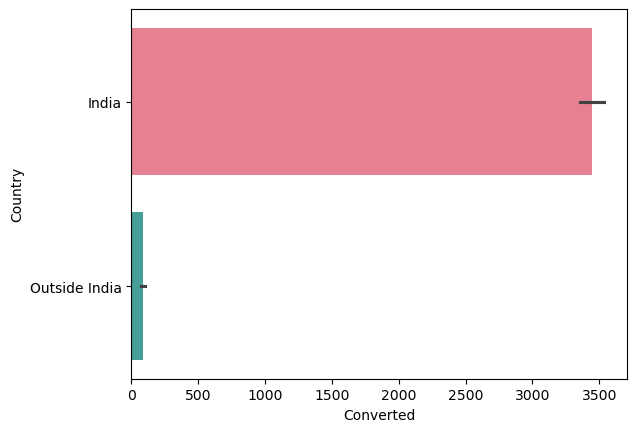

In [192]:
sns.barplot(y='Country', x='Converted', palette='husl', data=leads, estimator=np.sum)

### Assigning An Unique Category to NULL/SELECT values

#### Instead of deleting columns with huge null value percentage(which results in loss of data), this strategy adds more information into the dataset and results in the change of variance.

***Creating a new category consisting on NULL/Select values for the field `Lead Quality`***

### `'Select' values in some columns` : 

#### Here are the identified issues with the dataset, categorized by column:
Lead Source:
WeLearn and WeLearnblog_home are referring to the same source and should be merged.
Facebook and social media should be treated as separate categories.
Country:
Australia, Asian countries, and Asia/Pacific Region should be treated as distinct categories.
Tags:
Invalid number and wrong number given are equivalent and should be merged into one category.
Last Activity vs. Last Notable Activity:
Last activity and last notable activity are highly correlated. To avoid multicollinearity, one of these columns should be dropped.
Other Potential Issues:
Many columns have only a single category, making them redundant and potentially removable.
Same categories are perceived differently due to case inconsistencies (e.g., Google vs. google).
The value Select is equivalent to missing data (NaN) and should be treated accordingly.
Possible overlaps or inconsistencies may exist in the City column, requiring review for duplicates or similar entries.
"""
'.

In [196]:
leads['Lead Quality'].value_counts()

Lead Quality
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [198]:
leads['Lead Quality'].isnull().sum()

4753

In [200]:
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Lead Quality
Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Lead Quality'>

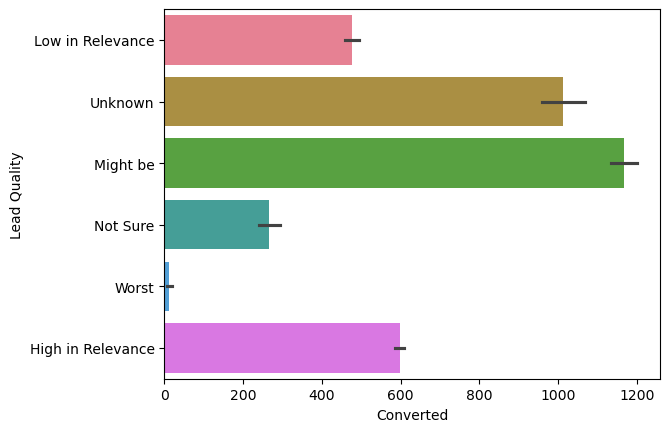

In [202]:
sns.barplot(y='Lead Quality', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Asymmetrique Profile Index`***

In [205]:
leads['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    2771
01.High      2201
03.Low         31
Name: count, dtype: int64

In [207]:
leads['Asymmetrique Profile Index'].isnull().sum()

4201

In [209]:
leads['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Asymmetrique Profile Index'>

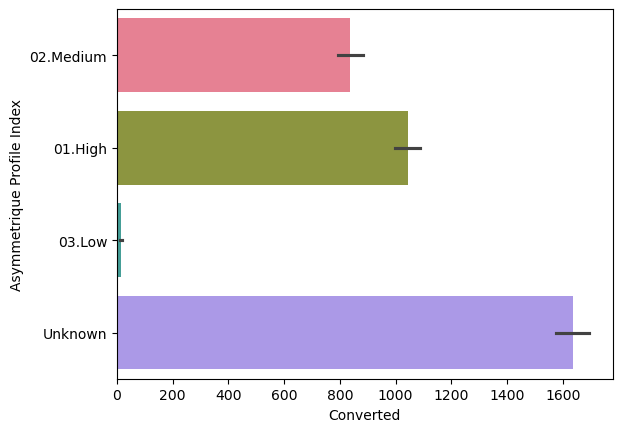

In [211]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Asymmetrique Activity Index`***

In [214]:
leads['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3820
01.High       821
03.Low        362
Name: count, dtype: int64

In [216]:
leads['Asymmetrique Activity Index'].isnull().sum()

4201

In [218]:
leads['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Index'>

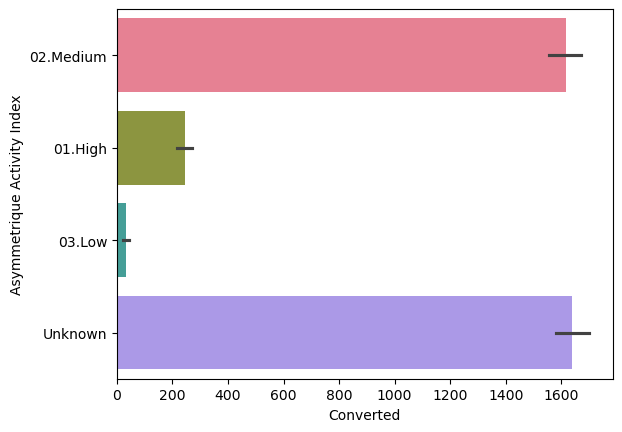

In [220]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `City`***

In [223]:
leads['City'].isnull().sum()

1420

In [225]:
leads['City'].fillna("Unknown", inplace = True)
leads['City'].value_counts()

City
Mumbai                         3220
Select                         2218
Unknown                        1420
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: count, dtype: int64

In [227]:
leads['City'].replace('Select', 'Unknown', inplace =True)
leads['City'].value_counts()

City
Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='City'>

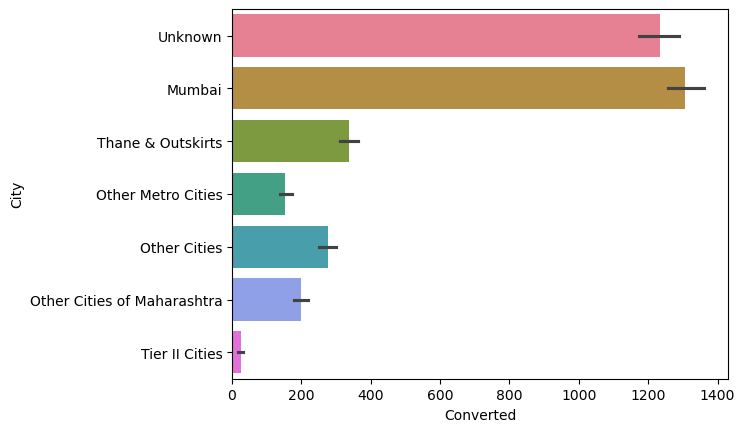

In [229]:
sns.barplot(y='City', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Last Activity`***

In [232]:
leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [234]:
leads['Last Activity'].isnull().sum()

101

In [236]:
leads['Last Activity'].fillna("Unknown", inplace = True)
leads['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Last Activity'>

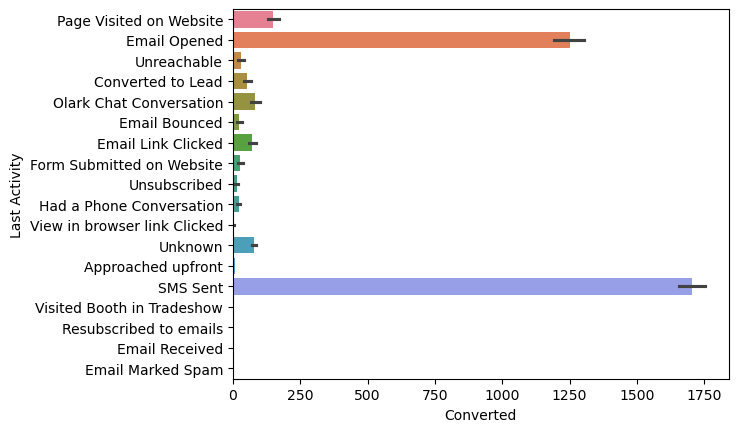

In [238]:
sns.barplot(y='Last Activity', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Lead Profile`***

In [241]:
leads['Lead Profile'].value_counts()

Lead Profile
Select                         4115
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [243]:
leads['Lead Profile'].isnull().sum()

2709

In [245]:
leads['Lead Profile'].fillna("Unknown", inplace = True)
leads['Lead Profile'].value_counts()

Lead Profile
Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [247]:
leads['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads['Lead Profile'].value_counts()

Lead Profile
Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Lead Profile'>

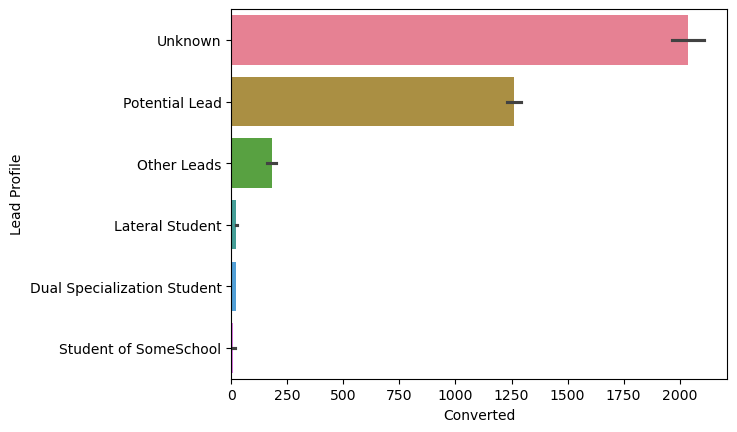

In [249]:
sns.barplot(y='Lead Profile', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `What is your current occupation`***

In [252]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [254]:
leads['What is your current occupation'].isnull().sum()

2690

In [256]:
leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='What is your current occupation'>

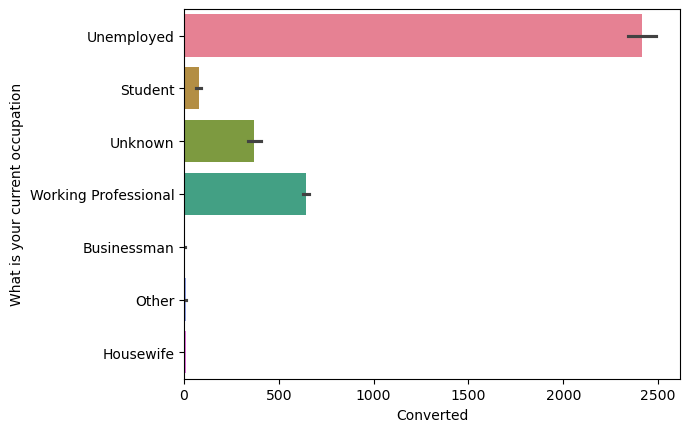

In [258]:
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Specialization`***

In [261]:
leads['Specialization'].value_counts()

Specialization
Select                               1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [263]:
leads['Specialization'].isnull().sum()

1438

In [265]:
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Specialization
Select                               1914
Unknown                              1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

<Axes: xlabel='Converted', ylabel='Specialization'>

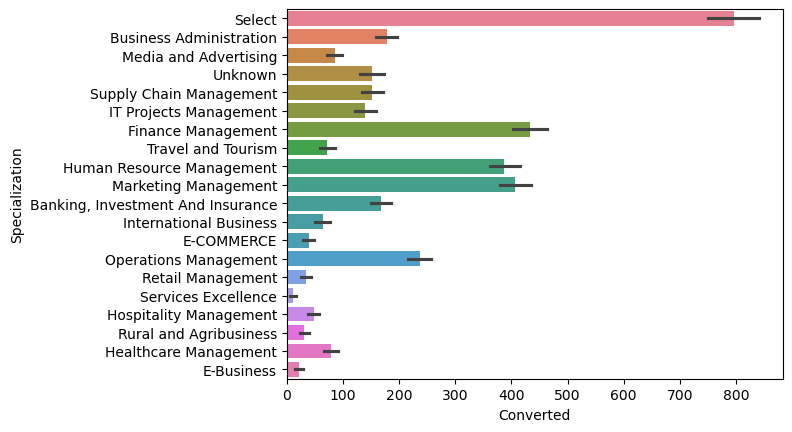

In [267]:
sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads, estimator=np.sum)

***Creating a new category consisting on NULL/Select values for the field `Tags`***

In [270]:
leads['Tags'].value_counts()

Tags
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to O

In [272]:
leads['Tags'].isnull().sum()

3342

In [274]:
leads['Tags'].fillna("Unknown", inplace = True)
leads['Tags'].value_counts()

Tags
Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch 

## Reinspecting Null Values

In [279]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
Lead Number,0,0.0
Newspaper Article,0,0.0
A free copy of Mastering The Interview,0,0.0
Asymmetrique Profile Index,0,0.0
Asymmetrique Activity Index,0,0.0


### Checking for Outliers

In [284]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9204.0,617194.608648,23418.830233,579533.0,596484.5,615479.0,637409.25,650513.1,655405.85,659599.46,660737.0
Converted,9204.0,0.383746,0.486324,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9204.0,3.449587,4.824662,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9204.0,489.005541,547.980340,0.0,14.0,250.0,938.00,1380.0,1562.00,1839.97,2272.0
Page Views Per Visit,9204.0,2.364923,2.145999,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


In [286]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


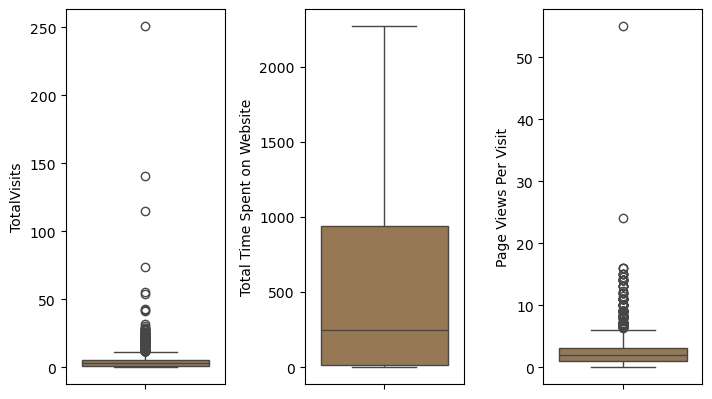

In [288]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

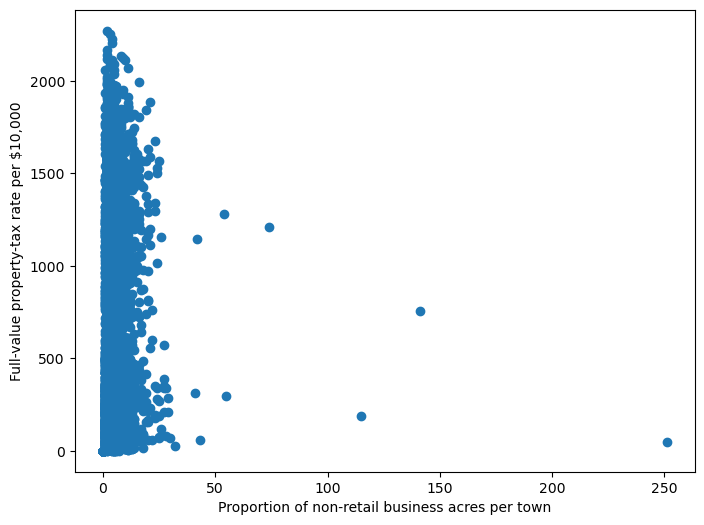

In [290]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leads['TotalVisits'], leads['Total Time Spent on Website'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [292]:
sns.jointplot(leads['Page Views Per Visit'],leads['Total Time Spent on Website'], color="b")
plt.show()

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

### Removing outlier based on interquartile distance

In [295]:
Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(8575, 27)

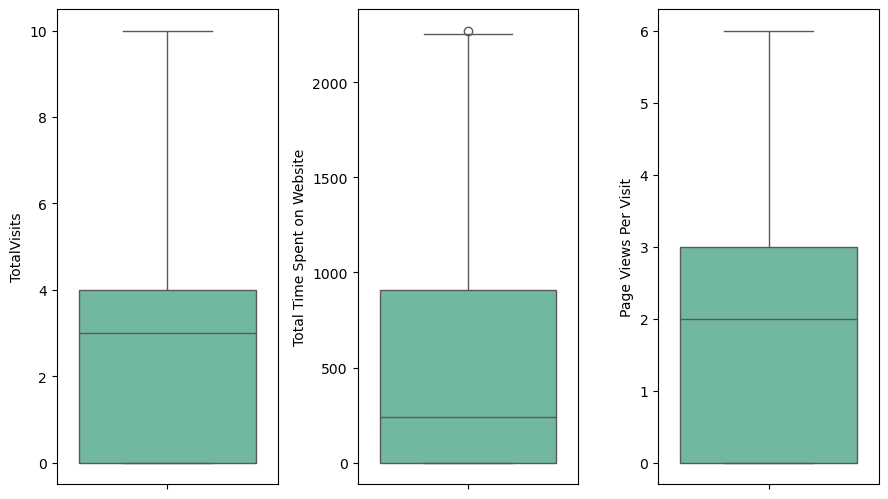

In [297]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=leads)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

In [299]:
leads.shape

(8575, 27)

### Mapping attributes into binary

In [302]:
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,0,Modified


### Dummy variable creation

In [305]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.shape

(8575, 66)

In [307]:
# creating dummy variables but removing the unknown class

# 'Lead Quality'
ml = pd.get_dummies(leads['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# 'Asymmetrique Activity Index'
ml = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# 'Tags'
ml = pd.get_dummies(leads['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
 'Lead Profile'
ml = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
#'What is your current occupation'
ml = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
#'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# 'City'
ml = pd.get_dummies(leads['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
# 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)
#--------------------------------------------------------------------------------------
leads.shape

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

### Dropping the variables with colinearity based on exploration

In [310]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
leads.shape

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [312]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,True,False,False,False,False,False,False,False
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,False,False
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,False,False,False
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,True,False,False,False,False,False,False,False
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

In [ ]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

##  Splitting Data into test Train sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

In [ ]:
# Putting our target varible seperatly
y = leads['Converted']

y.head()

In [ ]:
# Splitting sdata
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

In [ ]:
X_train.describe()

### Checking intial Lead Conversion Rate

In [ ]:
### Checking the Lead Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

We have almost 38% lead conversion rate

## Model Building


In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

##  Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

##### Assessing the model with StatsModels

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

#### Creating Confusion Metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### We have already removed most of the co-linear columns, therefore low colinearlity.

#### Checking the above statement with a heatmap

In [ ]:
.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Dropping the Variables

A

In [ ]:
col = col.drop('Tags_number not provided', 1)
col

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Dropping and Updating


Dropping insignificant variables

In [ ]:
col = col.drop('Tags_wrong number given', 1)
col

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### Repeating the process


In [ ]:
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### Repeating the process



In [ ]:
col = col.drop('Tags_invalid number', 1)
col

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


NameError: name 'pd' is not defined

In [ ]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Our latest model have the following features:
 - <font color = grey>All variables have p-value < 0.05. </font>
 - <font color = grey>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
 - <font color = grey>The overall accuracy of `0.9125` at a probability threshold of 0.05 is also very acceptable.</font>
 
### This accuracy is sufficient for model prodiction

## Performance Matrices

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))


 ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### GINI 

In [ ]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

## Finding Optimal Cutoff Point

Sensitivity vs Specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

In [ ]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

##  Precision and Recall

In [ ]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

In [ ]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

### Precision vs recall

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### Based on the precision-recall graph, the optimal threshold value is approximately 0.37. However, to meet the business objective of maintaining a Lead Conversion Rate (LCR) around 80%, we may need to adjust this threshold to ensure that the model selects leads that can drive this conversion rate. 


### Calculating the F1 score


In [ ]:
F1 = 2*(precision*recall)/(precision+recall)
F1

## Making predictions on the test set

#### Using the scaler function from the train dataset to transfor the test dataset

In [ ]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

In [ ]:
X_test = X_test[col]
X_test.head()

#### Adding the constant

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final.shape

#### Using the probability threshold value 0f 0.33 on the test dataset to predict if a lead will convert

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

In [ ]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

### Confusion Matrix in Visuals

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_test)
all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 12);
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Showcasing the different metrics beyond accuracy on the test dataset

##### Sensitivity
TP / TP + FN

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

##### Specificity
TN / TN + FP

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

##### False Postive Rate
FP / TN + FP

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

##### Positive Predictive Value
TP / TP + FP

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

##### Negative Predictive Value
TN / TN + FN

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

##### Precision
TP / TP + FP

In [ ]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

##### Recall
TP / TP + FN

In [ ]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [ ]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

##### Cross Validation Score

#### To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [ ]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

### Plotting the ROC Curve for Test Dataset

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Area Under the Curve(GINI)

In [ ]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

***As a rule of thumb, an AUC can be classed as follows,***

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail
 
***Since we got a value of 0.9678, our model seems to be doing well on the test dataset.***

In [ ]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

In [ ]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

In [ ]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

### Concatenating the train and the test dataset with the Conversion Probabilities

In [ ]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

In [ ]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

In [ ]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

In [ ]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

In [ ]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

In [ ]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

In [ ]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

#### Concatenating the 2 dataframes .



In [ ]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

In [ ]:
# Inspecting the dataframe shape
leads_with_score.shape

In [ ]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

## Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [ ]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

#### Sorting the feature variables based on their relative coefficient values

In [ ]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
##

#### Plot showing the feature variables based on their relative coefficient values

In [ ]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [141]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

NameError: name 'feature_importance' is not defined

## Summary and Conclusion

### After trying several models, we finally chose a model with the following characteristics:

Statistical Significance: All variables have p-values less than 0.05, indicating that the relationships observed are statistically significant.

Multicollinearity: Low Variance Inflation Factor (VIF) values suggest minimal multicollinearity among the features, which is important for ensuring the reliability of the model's coefficients.

Correlation: The heatmap supports your findings by visually indicating that features are not highly correlated with one another.

Model Performance: An overall accuracy of 0.9056 at a probability threshold of 0.33 on the test dataset indicates a strong model performance, suggesting that it can effectively classify or predict outcomes based on the features.

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_switched off|
|Tags_Ringing|
|Tags_Already a student|
|Tags_Not doing further education|
|Lead Quality_Worst|
|Tags_opp hangup|
|Tags_Interested  in full time MBA|
|Tags_Interested in other courses|
|Asymmetrique Activity Index_03.Low|


*